# K_ras peptides

In [45]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)

df_data = pd.read_csv('data/kras/all.tsv', sep='\t', header=None, names=['smi', 'IC50'])
df_data['IC50'] = df_data['IC50'].apply(lambda x: float(x.replace(',', '')))
df_data['score'] = df_data['IC50'].apply(lambda x: np.log10(x) if x > 0 else np.nan)

df_data.to_csv('data/kras/raw/all.csv.gz', index=False, compression='gzip')
df_data.head()


,smi,IC50,score
0,NC(NCCC[C@H](NC([C@@H](NC([C@@H]1CSSC[C@H](NC([C@@H](NC([C@@H](NC(=O)C)CCCNC(=[NH2+])N)=O)CCCNC(=[NH2+])N)=O)C(=O)N2[C@@H](CCC2)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](Cc3ccc(O)cc3)C(=O)N[C@@H]([C@H](CC)C)C(=O)N[C@@H](CO)C(=O)N[C@@H](Cc4ccc(O)cc4)C(=O)N[C@@H](CC(=O)O)C(=O)N5[C@@H](CCC5)C(=O)N[C@@H](C(C)C)C(=O)N1)=O)CCCNC(=[NH2+])N)=O)C(=O)N)=[NH2+].C(F)(F)(F)C([O-])=O,8.9,0.949390
1,CC[C@@H](C)[C@H]1C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N2CCC[C@H]2C(=O)N[C@H](C(=O)N[C@@H](CSSC[C@@H](C(=O)N3CCC[C@H]3C(=O)N[C@H](C(=O)N[C@H](C(=O)N1)CC4=CC=C(C=C4)O)CC(C)C)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)[NH-])C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N)C(C)C)CC(=O)O)CC5=CC=C(C=C5)O)CO.[Ac],1.6,0.204120
2,CC[C@@H](C)[C@H]1C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N2CCC[C@H]2C(=O)N[C@H](C(=O)N[C@@H](CSSC[C@@H](C(=O)N3CCC[C@H]3C(=O)N[C@H](C(=O)N[C@H](C(=O)N1)CC4=CC=C(C=C4)O)CC(C)C)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)[NH-])C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N)C(C)C)CC(=O)O)CC5=CC=C(C=C5)O)CO.[Ac],1.6,0.204120
3,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H]2CCCN2C(=O)[C@@H](NC(C)=O)CSSC[C@@H](C(N)=O)NC(=O)[C@H](C(C)C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(=O)O)NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@H](CO)NC1=O,11.0,1.041393
4,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H]2CCCN2C(=O)[C@@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H](CCCNC(=N)N)NC(C)=O)CSSC[C@@H](C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@H](CCCNC(=N)N)C(N)=O)NC(=O)[C@H](C(C)C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(=O)O)NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@H](CO)NC1=O,6.1,0.785330


x range: 0.3 20600.0
y range: 6.882135433244682e-25 0.7034619565563733


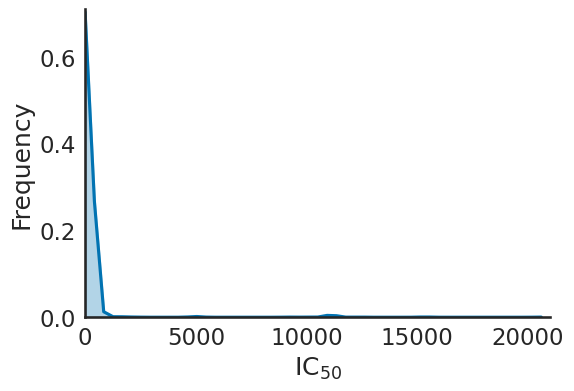

In [63]:
import matplotlib.pyplot as plt
from utils import plot_style_utils
import scipy.stats as stats

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")

# plot density of scores
scores = df_data['IC50'].values
x_min = np.min(scores)
x_max = np.max(scores)

x = np.linspace(x_min, x_max, 50)
y = stats.gaussian_kde(scores)(x)/sum(stats.gaussian_kde(scores)(x))

print('x range:', x_min, x_max)
print('y range:', np.min(y), np.max(y))

# ax.hist(df_data['score'], bins=100, color=plot_style_utils.CAT_PALETTE[0])
ax.plot(x, y, color=plot_style_utils.CAT_PALETTE[0])
ax.fill_between(x, 0, y, alpha=0.3, color=plot_style_utils.CAT_PALETTE[0])
ax.set_xlim(0, 21000)
ax.set_ylim(0, 0.71)

ax.set_xlabel('IC$_{50}$')
ax.set_ylabel('Frequency')

plot_style_utils.prettify_ax(ax)
plot_style_utils.save_for_pub(fig=fig, path='figures/kras/kras_ic50_dist')

x range: -0.5228787452803376 4.313867220369153
y range: 0.00045804134263905267 0.03672259518787954


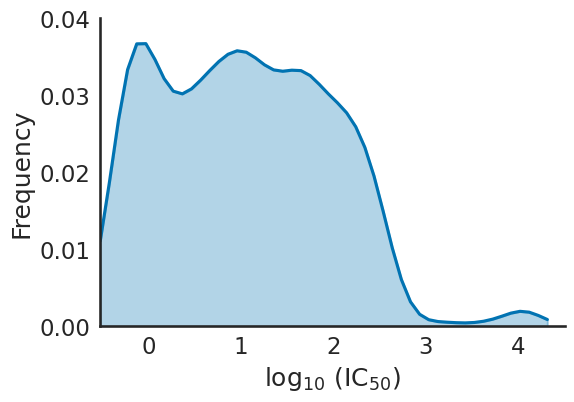

In [64]:
import matplotlib.pyplot as plt
from utils import plot_style_utils
import scipy.stats as stats

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.set_pub_plot_context(context="talk")

# plot density of scores
scores = df_data['score'].values
x_min = np.min(scores)
x_max = np.max(scores)

x = np.linspace(x_min, x_max, 50)
y = stats.gaussian_kde(scores)(x)/sum(stats.gaussian_kde(scores)(x))

print('x range:', x_min, x_max)
print('y range:', np.min(y), np.max(y))

# ax.hist(df_data['score'], bins=100, color=plot_style_utils.CAT_PALETTE[0])
ax.plot(x, y, color=plot_style_utils.CAT_PALETTE[0])
ax.fill_between(x, 0, y, alpha=0.3, color=plot_style_utils.CAT_PALETTE[0])
ax.set_xlim(-0.53, 4.5)
ax.set_ylim(0, 0.04)

ax.set_xlabel('log$_{10}$ (IC$_{50}$)')
ax.set_ylabel('Frequency')

plot_style_utils.prettify_ax(ax)
plot_style_utils.save_for_pub(fig=fig, path='figures/kras/kras_ic50_log_dist')

## Feature processing

### Fingerprints (fps)

In [4]:
import warnings
import numpy as np
from rdkit import Chem, rdBase, DataStructs
from rdkit.Chem import AllChem
from typing import List

rdBase.DisableLog('rdApp.error')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

def fingerprints_from_smiles(smiles: List, size=2048):
    """ Create ECFP fingerprints of smiles, with validity check """
    fps = []
    valid_mask = []
    for i, smile in enumerate(smiles):
        mol = Chem.MolFromSmiles(smile)
        valid_mask.append(int(mol is not None))
        fp = fingerprints_from_mol(mol, size=size) if mol else np.zeros((1, size))
        fps.append(fp)

    fps = np.concatenate(fps, axis=0)
    return fps, valid_mask


def fingerprints_from_mol(molecule, radius=3, size=2048, hashed=False):
    """ Create ECFP fingerprint of a molecule """
    if hashed:
        fp_bits = AllChem.GetHashedMorganFingerprint(molecule, radius, nBits=size)
    else:
        fp_bits = AllChem.GetMorganFingerprintAsBitVect(molecule, radius, nBits=size)
    fp_np = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp_bits, fp_np)
    return fp_np.reshape(1, -1)

In [66]:
# train = True
train = False
if train:
    X_fps = fingerprints_from_smiles(df_data.smi)[0]
    np.save('data/kras/processed/X_fps.npy', X_fps)
else:
    X_fps = np.load('data/kras/processed/X_fps.npy')

X_fps.shape

(2253, 2048)

### BERT features

In [15]:
from smi_bert.dataset.tokenizer import SmilesTokenizer
from smi_bert.model.bert import BERT
from utils.utils import parse_config, load_model
import torch

def load_bert_model(ckpt, config, device='cuda', model_type='smi_bert'):
    if model_type == 'smi_bert':
        tokenizer = SmilesTokenizer(max_len=config.data.max_len)
    else:
        raise ValueError(f'Invalid model_type: {model_type}')

    model = BERT(tokenizer, **config.model)
    model = load_model(model, ckpt, device)
    model.eval()
    return model, device

def get_bert_embd(encoder, inputs, device='cuda',):
    with torch.no_grad():
        tokens = encoder.tokenize_inputs(inputs).to(device)
        batch_lens = (tokens != encoder.tokenizer.pad_token_id).sum(1)
        embd = encoder.embed(tokens)
        reps = []
        for i, tokens_len in enumerate(batch_lens):
            reps.append(embd[i, 1 : tokens_len - 1].mean(0))
    return torch.stack(reps)

def encode_with_bert(list, model, device='cuda', batch_size=128):
    model.to(device)
    reps = []
    for i in range(0, len(list), batch_size):
        reps.append(get_bert_embd(model, list[i : i + batch_size], device=device))
    reps = torch.cat(reps).cpu().numpy()
    # logger.info(f"list shape: {list.shape}, reps shape: {reps.shape}")
    return reps

#### SMILES BERT

In [16]:
# train = True
train = False
if train:
    ckpt='results/smi_bert/pretrain_ft/model_final_0.230.pt'  # 0.555	0.809	0.339	0.705	0.588
    config_file='smi_bert/pretrain_config.yaml'
    config = parse_config(config_file)
    model, device = load_bert_model(ckpt=ckpt, config=config)

    X_smi_bert = encode_with_bert(df_data.smi, model)

    np.save('data/kras/X_train_smi_bert.npy', X_smi_bert)
else:
    X_smi_bert = np.load('data/kras/X_train_smi_bert.npy')

X_smi_bert.shape

((1802, 512), (1802,), (451, 512), (451,))

### RDKit descriptors

In [17]:
import warnings
import numpy as np
from rdkit import Chem, rdBase, DataStructs
from rdkit.Chem import AllChem
from typing import List
from rdkit import rdBase, Chem
from rdkit.Chem import Descriptors, rdMolDescriptors

rdBase.DisableLog('rdApp.error')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

def getMolDescriptors(mol, missingVal=0):
    """ calculate the full list of descriptors for a molecule """

    values, names = [], []
    for nm, fn in Descriptors._descList:
        try:
            val = fn(mol)
        except:
            val = missingVal
        values.append(val)
        names.append(nm)

    custom_descriptors = {'hydrogen-bond donors': rdMolDescriptors.CalcNumLipinskiHBD,
                          'hydrogen-bond acceptors': rdMolDescriptors.CalcNumLipinskiHBA,
                          'rotatable bonds': rdMolDescriptors.CalcNumRotatableBonds,}
    for nm, fn in custom_descriptors.items():
        try:
            val = fn(mol)
        except:
            val = missingVal
        values.append(val)
        names.append(nm)
    return values,names

# getMolDescriptors('CC(=O)SCCCC[C@H](N)C(O)=O')

#### Peptide descriptors

In [18]:
def get_pep_dps_from_smi(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
    except:
        print(f"convert smi {smi} to molecule failed!")
        mol = None
    
    dps, _ = getMolDescriptors(mol)
    return np.array(dps)

def get_pep_dps(smi_list):
    return np.array([get_pep_dps_from_smi(smi) for smi in smi_list])

In [67]:
import numpy as np

# train = True
train = False
if train:
    
    X_dps = get_pep_dps(df_data.smi)

    np.save('data/kras/processed/X_dps.npy', X_dps)
else:
    X_dps = np.load('data/kras/processed/X_dps.npy')

X_dps.shape

(2253, 211)

: 

### ResNet features

In [21]:
from utils.utils import parse_config, load_model
from image_mol.model.resnet import init_model
from image_mol.model.molcl import MolCL

ckpt_file='results/resnet/pretrain/model_9_0.775.pt'
config_file='image_mol/pretrain_config.yaml'
device='cuda'

config = parse_config(config_file)
resnet = init_model(**config.model.resnet)
model = MolCL(resnet, device, **config.model.molcl)

model = load_model(model, ckpt_file, device)

In [22]:
resnet = model.encoder
from torch import nn
for r, c in zip(list(resnet.children())[:-1], list(model.encoder.children())):
    r = c

In [24]:
from torchvision import transforms
import torch
import cv2
from utils.utils import parse_config, load_model
from image_mol.model.resnet import init_model
from image_mol.model.molcl import MolCL

def load_molcl_model(ckpt_file='results/resnet/pretrain/model_9_0.775.pt', config_file='image_mol/pretrain_config.yaml', device='cuda'):
    config = parse_config(config_file)
    resnet = init_model(**config.model.resnet)
    model = MolCL(resnet, device, **config.model.molcl)

    model = load_model(model, ckpt_file, device)
    return model

def get_resnet_embd(model, img):
    with torch.no_grad():
        embd = model.get_img_embd(img)
    return embd

def load_transform_img(img_paths, transform):
    imgs = [transform(cv2.imread(fp)) for fp in img_paths]
    img = torch.stack(imgs)
    return img

def encode_with_molcl(list, model, device='cuda', batch_size=80, image_size=500):
    transform = transforms.Compose([transforms.ToPILImage(), transforms.Resize((image_size, image_size)), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),])
    reps = []
    model.to(device)
    for i in range(0, len(list), batch_size):
        img_paths = list[i : i + batch_size]
        img = load_transform_img(img_paths, transform)
        img = img.to(device)
        reps.append(get_resnet_embd(model, img))
    reps = torch.cat(reps).cpu().numpy()
    # logger.info(f"list shape: {list.shape}, reps shape: {reps.shape}")
    return reps

# encode_with_resnet(["data/gradcam/cycpep_0.png"], model)

In [ ]:
import numpy as np

# train = True
train = False
if train:
    model = load_molcl_model()
    X_train = encode_with_molcl(df_train.smi_img, model)
    X_test = encode_with_molcl(df_test.smi_img, model)

    np.save('data/kras/X_train_molimg_embd.npy', X_train)
    np.save('data/kras/X_test_molimg_embd.npy', X_test)
else:
    X_train = np.load('data/kras/X_train_molimg_embd.npy')
    X_test = np.load('data/kras/X_test_molimg_embd.npy')

X_train.shape, y_train.shape, X_test.shape, y_test.shape

## Modeling

### Final features

In [43]:
# features = ['pep_dps', ]
# features = ['fps', ]
features = ['smi_bert', ]
# features = ['molimg_embd', ]

# features = ['pep_dps', 'fps', ]
# features = ['pep_dps', 'smi_bert', ]
# features = ['fps', 'smi_bert', ]

# features = ['fps', 'pep_dps', 'smi_bert', ]
# features = ['fps', 'pep_dps', 'molimg_embd', ]

X_train_features = []
X_test_features = []
for feat in features:
    try:
        X_train = np.load(f'data/kras/X_train_{feat}.npy')
        X_test = np.load(f'data/kras/X_test_{feat}.npy')

        X_train_features.append(X_train)
        X_test_features.append(X_test)
    except:
        raise ValueError(f'Feature {feat} not supported')

X_train = np.concatenate(X_train_features, axis=1)
X_test = np.concatenate(X_test_features, axis=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1802, 512), (1802,), (451, 512), (451,))

In [38]:
import matplotlib.pyplot as plt
from utils.utils import get_regresssion_metrics

def plot_scatter_y(y, y_hat, x_label='y', y_label='y_hat', save_path=None):
    plt.scatter(y, y_hat, alpha=0.1)
    get_regresssion_metrics(y, y_hat)
    mae = np.mean(np.abs(y - y_hat))
    print(f'MAE: {mae:.3f}, y mean: {np.mean(y):.3f}, y_hat mean: {np.mean(y_hat):.3f}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if save_path:
        plt.savefig(save_path+f'_{mae:.3f}.pdf', dpi=300, bbox_inches='tight')
    plt.show()

### XGBoost regressor

MAE 	 MSE 	 R2 	 Spearman 	 Pearson
1.827	5.250	-33.218	0.278	0.309
MAE: 1.827, y mean: 2.398, y_hat mean: 1.303


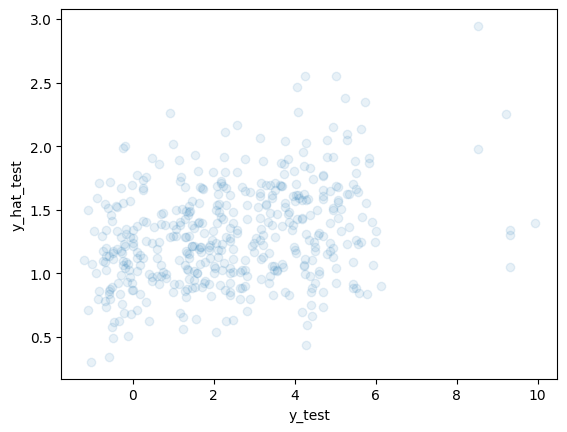

In [44]:
from xgboost import XGBRegressor
import joblib

from sklearn.preprocessing import StandardScaler

is_save = False
save_path='data/kras/fps_xgbr.model'

# scale y_train to focus on small values
# y_train = np.log(y_train)
# y_test = np.log(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)
# if is_save:
#     joblib.dump(model, save_path)
#     model = joblib.load(save_path)
y_hat = model.predict(X_test)
plot_scatter_y(y_test, y_hat, x_label='y_test', y_label='y_hat_test', save_path=save_path)